## Numpy Implementation of RNN

In [1]:
import numpy as np

In [2]:
timesteps = 100
input_features = 32
output_features = 64

In [3]:
inputs = np.random.random((timesteps, input_features))

In [4]:
state_t = np.zeros((output_features,))

In [5]:
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

In [6]:
successive_outputs = []

In [7]:
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t)+np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t

In [8]:
final_output_sequence = np.concatenate(successive_outputs, axis=0)

## Simple RNN

In [9]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

In [10]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [12]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [13]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


## IMDB Dataset

In [14]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [15]:
max_features = 10000
maxlen = 500
batch_size = 32

In [16]:
print("Loading data...")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

Loading data...


In [17]:
input_train = sequence.data_utils.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.data_utils.pad_sequences(input_test, maxlen=maxlen)

In [18]:
from keras.layers import Dense

In [19]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [21]:
history = model.fit(input_train, y_train, epochs=10, batch_size = 128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 17s 97ms/step - loss: 0.5708 - acc: 0.6919 - val_loss: 0.4071 - val_acc: 0.8294
Epoch 2/10
157/157 [==============================] - 15s 96ms/step - loss: 0.3652 - acc: 0.8467 - val_loss: 0.3751 - val_acc: 0.8380
Epoch 3/10
157/157 [==============================] - 14s 91ms/step - loss: 0.2800 - acc: 0.8868 - val_loss: 0.3852 - val_acc: 0.8388
Epoch 4/10
157/157 [==============================] - 14s 86ms/step - loss: 0.2205 - acc: 0.9148 - val_loss: 0.3643 - val_acc: 0.8522
Epoch 5/10
157/157 [==============================] - 14s 86ms/step - loss: 0.1885 - acc: 0.9298 - val_loss: 0.4229 - val_acc: 0.8212
Epoch 6/10
157/157 [==============================] - 14s 91ms/step - loss: 0.1411 - acc: 0.9489 - val_loss: 0.3957 - val_acc: 0.8552
Epoch 7/10
157/157 [==============================] - 14s 87ms/step - loss: 0.0952 - acc: 0.9676 - val_loss: 0.4697 - val_acc: 0.8324
Epoch 8/10
157/157 [==============================] - 14s 89ms

In [22]:
import matplotlib.pyplot as plt

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
epochs = range(1, len(acc)+1)

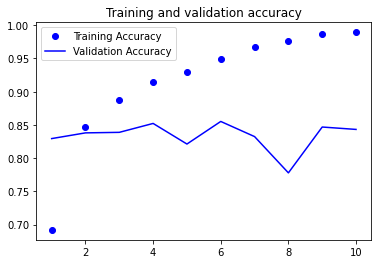

In [26]:
plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title("Training and validation accuracy")
plt.legend()

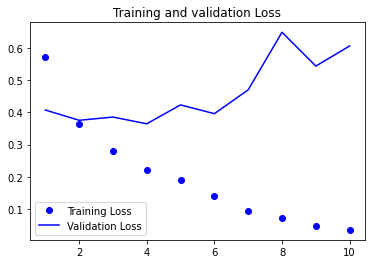

In [27]:
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title("Training and validation Loss")
plt.legend()

## LSTM

In [28]:
from keras.layers import LSTM

In [29]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['acc'])

In [31]:
history = model.fit(input_train, y_train, epochs=10, batch_size = 128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 33s 199ms/step - loss: 0.5274 - acc: 0.7616 - val_loss: 0.6400 - val_acc: 0.6690
Epoch 2/10
157/157 [==============================] - 30s 191ms/step - loss: 0.3111 - acc: 0.8762 - val_loss: 0.3770 - val_acc: 0.8318
Epoch 3/10
157/157 [==============================] - 31s 195ms/step - loss: 0.2454 - acc: 0.9075 - val_loss: 0.2871 - val_acc: 0.8844
Epoch 4/10
157/157 [==============================] - 31s 197ms/step - loss: 0.2065 - acc: 0.9225 - val_loss: 0.2845 - val_acc: 0.8830
Epoch 5/10
157/157 [==============================] - 31s 195ms/step - loss: 0.1776 - acc: 0.9370 - val_loss: 0.4121 - val_acc: 0.8624
Epoch 6/10
157/157 [==============================] - 31s 196ms/step - loss: 0.1573 - acc: 0.9431 - val_loss: 0.4458 - val_acc: 0.8656
Epoch 7/10
157/157 [==============================] - 31s 195ms/step - loss: 0.1417 - acc: 0.9499 - val_loss: 0.3908 - val_acc: 0.8612
Epoch 8/10
157/157 [==============================] - 3

In [32]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

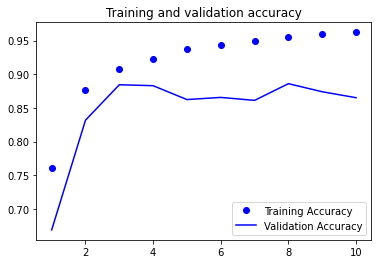

In [33]:
plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title("Training and validation accuracy")
plt.legend()

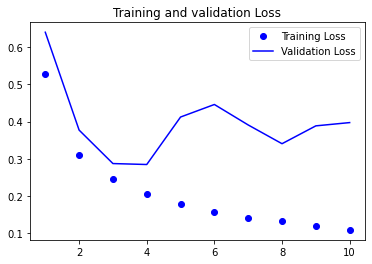

In [34]:
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title("Training and validation Loss")
plt.legend()